<a href="https://colab.research.google.com/github/Kristelwen/TM10007_PROJECT/blob/master/brat_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment
Kristel, Lalot, Marijn, Tahisa

In [42]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/Kristelwen/TM10007_PROJECT

# Data loading and importing modules

In [0]:
# Importing modules
# General packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from time import time
from sklearn import datasets as ds
from scipy.stats import randint

# Preprocessing packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

# SVM Kernels
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics.pairwise import rbf_kernel, sigmoid_kernel
from sklearn.decomposition import KernelPCA

# Model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# Performance metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Regularization
from sklearn.linear_model import Lasso, RidgeClassifier
from sklearn.feature_selection import SelectFromModel

In [44]:
# Loading the data
from brats.load_data import load_data

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


The number of samples: 167
The number of columns: 725


In [45]:
# Display data for analysis
data_top = data.head()
data_top 

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,VOLUME_NET_over_TC,VOLUME_ED_over_TC,VOLUME_ET_OVER_WT,VOLUME_NET_OVER_WT,VOLUME_ED_OVER_WT,VOLUME_TC_OVER_WT,VOLUME_ET_OVER_BRAIN,VOLUME_NET_OVER_BRAIN,VOLUME_ED_over_BRAIN,VOLUME_TC_over_BRAIN,VOLUME_WT_OVER_BRAIN,DIST_Vent_TC,DIST_Vent_ED,INTENSITY_Mean_ET_T1Gd,INTENSITY_STD_ET_T1Gd,INTENSITY_Mean_ET_T1,INTENSITY_STD_ET_T1,INTENSITY_Mean_ET_T2,INTENSITY_STD_ET_T2,INTENSITY_Mean_ET_FLAIR,INTENSITY_STD_ET_FLAIR,INTENSITY_Mean_NET_T1Gd,INTENSITY_STD_NET_T1Gd,INTENSITY_Mean_NET_T1,INTENSITY_STD_NET_T1,INTENSITY_Mean_NET_T2,INTENSITY_STD_NET_T2,INTENSITY_Mean_NET_FLAIR,INTENSITY_STD_NET_FLAIR,INTENSITY_Mean_ED_T1Gd,...,TEXTURE_NGTDM_NET_T1_Busyness,TEXTURE_NGTDM_NET_T1_Complexity,TEXTURE_NGTDM_NET_T1_Strength,TEXTURE_NGTDM_NET_T2_Coarseness,TEXTURE_NGTDM_NET_T2_Contrast,TEXTURE_NGTDM_NET_T2_Busyness,TEXTURE_NGTDM_NET_T2_Complexity,TEXTURE_NGTDM_NET_T2_Strength,TEXTURE_NGTDM_NET_FLAIR_Coarseness,TEXTURE_NGTDM_NET_FLAIR_Contrast,TEXTURE_NGTDM_NET_FLAIR_Busyness,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,TGM_Cog_X_2,TGM_Cog_Y_2,TGM_Cog_Z_2,TGM_T_2,TGM_Cog_X_3,TGM_Cog_Y_3,TGM_Cog_Z_3,TGM_T_3,TGM_Cog_X_4,TGM_Cog_Y_4,TGM_Cog_Z_4,TGM_T_4,TGM_Cog_X_5,TGM_Cog_Y_5,TGM_Cog_Z_5,TGM_T_5,TGM_Cog_X_6,TGM_Cog_Y_6,TGM_Cog_Z_6,TGM_T_6,label
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0006,1662,384,36268,2046,38314,1469432,4.328125,0.0458255,0.0105878,0.81232,0.18768,17.7263,0.043378,0.010022,0.946599,0.053401,0.001131,0.000261,0.024682,0.001392,0.026074,31.5903,2.7735,149.7977,10.4671,194.1422,15.1037,154.9225,43.4709,220.5894,30.2917,137.8881,6.3820,183.6933,14.8846,161.1005,35.8591,227.7510,23.9509,131.8402,...,0.02674,2536.7559,43.3129,0.036634,0.50304,0.024264,3593.3279,43.67590,0.057204,0.33980,0.021897,2203.2034,61.3293,8.00000,7.500000e-07,0.178609,0.096256,0.052741,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBM
TCGA-02-0009,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,0.276601,0.50075,0.49925,1.8050,0.178522,0.177990,0.643489,0.356511,0.003366,0.003356,0.012135,0.006723,0.018857,9.2443,3.0207,165.4345,6.4047,201.2400,13.4733,113.1601,10.1373,210.1810,15.9543,152.6013,4.2360,188.0607,11.1316,116.8538,10.0992,209.7901,16.7943,139.2815,...,0.31558,967.7845,3.7444,0.003790,0.36163,0.271420,1996.1440,2.77050,0.004966,0.28715,0.189980,1440.4285,3.5999,3.31250,1.000000e-09,0.077618,0.122900,0.094336,91.4736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBM
TCGA-02-0011,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,1.06144,0.40729,0.59271,0.5584,0.261349,0.380334,0.358318,0.641682,0.023428,0.034094,0.032120,0.057521,0.089641,1.0000,1.0000,186.3385,17.6126,188.2019,23.5195,172.8969,32.7401,167.1395,34.1684,149.0643,12.9090,158.4197,15.2632,197.4966,27.1781,165.1014,25.2120,161.5790,...,1.39580,1322.6082,0.7473,0.000634,0.31856,1.144300,2517.8629,0.84294,0.000794,0.17961,1.068800,1147.5177,0.8048,5.78125,1.000000e-09,0.132283,0.116006,0.096035,272.4290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBM
TCGA-02-0027,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,0.222584,0.61489,0.38511,1.7302,0.225222,0.141056,0.633722,0.366278,0.008632,0.005406,0.024288,0.014038,0.038325,1.0331,1.0000,178.6925,23.1751,199.7626,27.0047,157.0192,25.6793,173.6525,26.3596,120.3726,17.5926,199.5765,25.3652,194.2708,24.5411,207.5531,32.7868,129.2927,...,0.14356,1722.6804,6.9449,0.002126,0.54383,0.379490,3698.6228,2.31820,0.003284,0.41179,0.206600,3320.1690,4.7336,3.87500,1.000000e-09,0.100415,0.088249,0.096470,128.4680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBM
TCGA-02-0033,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,

# Preprocessing

In [0]:
# Drop columns which contain NaN values
threshold = math.floor(len(data)/2)  # calculate threshold, half of total rows
data_drop = data.dropna(thresh=threshold, axis=1)  # Delete columns/features with more than 'threshold' NaNs
data_drop = data_drop.dropna(axis=0)  # Delete rows/subjects with NaNs

# Split data and labels
labels = data_drop['label']
data_drop = data_drop.drop(columns="label")  # Data without labels

# Convert labels 'GBM' and 'LGG' to respectively 0 and 1
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data in a train (90%) and test set (10%)
data_train, data_test, label_train, label_test = train_test_split(data_drop, labels, test_size=0.1)
data_train2, data_val, label_train2, label_val = train_test_split(data_train, label_train, test_size=0.1)

# Feature scaling
scaler = RobustScaler()
transformer = scaler.fit(data_train.values)
data_scaled_train = transformer.transform(data_train.values)
data_df_train = pd.DataFrame(data_scaled_train, index = data_train.index, columns = data_train.columns)

data_scaled_test = transformer.transform(data_test.values)
data_df_test = pd.DataFrame(data_scaled_test, index = data_test.index, columns = data_test.columns)

# Feature selection with PCA
  # Training set
pca_train = PCA(n_components=130)  # Create a PCA with 130 components
pca_train.fit(data_scaled_train)  # Fit PCA
data_train_pca = pca_train.transform(data_scaled_train)
  # Test set
data_test_pca = pca_train.transform(data_scaled_test)  # Transform test data using PCA


# Classifiers

## k-Nearest-Neighbors

In [47]:
# Using different n_neighbors with weights = 'distance'
print('Results when weights are based on distance:')
n_neighbors=[1,5,7,10,11,15,20,50,100]
for n_neighbor in n_neighbors:
  clf = KNeighborsClassifier(n_neighbors=n_neighbor, weights='distance')
  clf.fit(data_train_pca, label_train)

  pred_train_knn = clf.predict(data_train_pca)
  acc_train_knn = accuracy_score(label_train, pred_train_knn)
  print ('Train set: {} neighbors gives an accuracy of {}'.format(n_neighbor, round(acc_train_knn,2)))

  pred_test_knn = clf.predict(data_test_pca)
  acc_test_knn = accuracy_score(label_test, pred_test_knn)
  print ('Test set: {} neighbors gives an accuracy of {}'.format(n_neighbor, round(acc_train_knn,2)))

# Using different n_neighbors with weights = 'uniform'
print('\n Results when weights are uniform:')
n_neighbors=[1,5,7,10,11,15,20,50,100]
for n_neighbor in n_neighbors:
  clf = KNeighborsClassifier(n_neighbors=n_neighbor, weights='uniform')
  clf.fit(data_train_pca, label_train)

  pred_train_knn = clf.predict(data_train_pca)
  acc_train_knn = accuracy_score(label_train, pred_train_knn)
  print ('Train set: {} neighbors gives an accuracy of {}'.format(n_neighbor, round(acc_train_knn,2)))
  
  pred_test_knn = clf.predict(data_test_pca)
  acc_test_knn = accuracy_score(label_test, pred_test_knn)
  print ('Test set: {} neighbors gives an accuracy of {}'.format(n_neighbor, round(acc_train_knn,2)))

Results when weights are based on distance:
Train set: 1 neighbors gives an accuracy of 1.0
Test set: 1 neighbors gives an accuracy of 1.0
Train set: 5 neighbors gives an accuracy of 1.0
Test set: 5 neighbors gives an accuracy of 1.0
Train set: 7 neighbors gives an accuracy of 1.0
Test set: 7 neighbors gives an accuracy of 1.0
Train set: 10 neighbors gives an accuracy of 1.0
Test set: 10 neighbors gives an accuracy of 1.0
Train set: 11 neighbors gives an accuracy of 1.0
Test set: 11 neighbors gives an accuracy of 1.0
Train set: 15 neighbors gives an accuracy of 1.0
Test set: 15 neighbors gives an accuracy of 1.0
Train set: 20 neighbors gives an accuracy of 1.0
Test set: 20 neighbors gives an accuracy of 1.0
Train set: 50 neighbors gives an accuracy of 1.0
Test set: 50 neighbors gives an accuracy of 1.0
Train set: 100 neighbors gives an accuracy of 1.0
Test set: 100 neighbors gives an accuracy of 1.0

 Results when weights are uniform:
Train set: 1 neighbors gives an accuracy of 1.0
Tes

In [48]:
# Hyperparameter optimization of number of neighbors and weights

# Our parameter to optimize is the number of estimators, which we vary uniformly between 1 and 400
param_distributions = {'n_neighbors': [1,5,7,10,11,15,20,50,100], 'weights': ['uniform','distance']}  # Willen we dit toevoegen: 'bootstrap': [True, False]? Maar dan komt vgm vaak False eruit, mar die overfit. 
    
# Execute RandomizedSearchCV to find optimal parameters
clf_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions, cv=5, random_state=42)

# Fit the classifier
clf_knn.fit(data_train_pca, label_train)

# Get the best parameters for the K-NN estimator
print(f'The best parameters found are {clf_knn.best_params_}')


The best parameters found are {'weights': 'uniform', 'n_neighbors': 1}


In [0]:
# Fitting the K-NN Classifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform')
KNN.fit(data_train_pca, label_train)

# Predictions
train_pred = KNN.predict(data_train_pca)
test_pred = KNN.predict(data_test_pca)

In [50]:
# Evaluate KNN using cross-validation
score_knn = cross_val_score(KNN, data_train_pca, label_train, cv=5)
mean_score_knn = score_knn.mean()

print(f'The accuracy of the validation set in 5 different folds is {score_knn}')
print(f'\n The mean accuracy of the validation set of 5 different folds is {round(mean_score_knn,2)}')

# Evaluate accuracy of KNN on training set
acc_train = accuracy_score(label_train, train_pred)
print(f'\n The accuracy of the training set is {round(acc_train,2)}')

# Evaluate accuracy of neural network on test set
acc_test = accuracy_score(label_test, test_pred)
print(f'\n The accuracy of the test set is {round(acc_test,2)}')

The accuracy of the validation set in 5 different folds is [0.74074074 0.80769231 0.80769231 0.80769231 0.76923077]

 The mean accuracy of the validation set of 5 different folds is 0.79

 The accuracy of the training set is 0.82

 The accuracy of the test set is 0.8


In [51]:
# Confusion matrices and classification reports
print('Confusion matrix and classification report of training set')
print(confusion_matrix(label_train, train_pred_RF))
print(classification_report(label_train, train_pred_RF))
print("---------------------------------------------------------------\n")

print('Confusion matrix and classification report of test set')
print(confusion_matrix(label_test, test_pred_RF))
print(classification_report(label_test, test_pred_RF))

Confusion matrix and classification report of training set
[[58 32]
 [33  8]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        90
           1       0.20      0.20      0.20        41

    accuracy                           0.50       131
   macro avg       0.42      0.42      0.42       131
weighted avg       0.50      0.50      0.50       131

---------------------------------------------------------------

Confusion matrix and classification report of test set
[[10  2]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.00      0.00      0.00         3

    accuracy                           0.67        15
   macro avg       0.38      0.42      0.40        15
weighted avg       0.62      0.67      0.64        15



## Random Forest Classifier

In [52]:
# Hyperparameter optimization: trying out different amount of trees and compare bootstrapping True and False.

#using different n_trees and bootstrapping  
print('Results when bootstrapping=True')
n_trees=[1,5,10,15,20,30,50,100,150,200]
for n_tree in n_trees:
  clf = RandomForestClassifier(n_estimators=n_tree, bootstrap=True)
  clf.fit(data_train_pca,label_train)
  
  predictions_train = clf.predict(data_train_pca)
  acc_train_RF = accuracy_score(label_train, predictions_train)
  
  print ('Train set: {} trees gives an accuracy of {}'.format(n_tree, round(acc_train_RF,2)))

  predictions_test = clf.predict(data_test_pca)
  acc_test_RF = accuracy_score(label_test, predictions_test)

  print ('Test set: {} trees gives an accuracy of {}'.format(n_tree, round(acc_test_RF, 2)))

print ('')

#using different n_trees without bootstrapping 
print('Results when bootstrapping=False')
for n_tree in n_trees:
  clf = RandomForestClassifier(n_estimators=n_tree, bootstrap=False)
  clf.fit(data_train_pca,label_train)
  
  predictions_train = clf.predict(data_train_pca)
  acc_train_RF = accuracy_score(label_train, predictions_train)
  print ('Train set: {} trees gives an accuracy of {}'.format(n_tree,round(acc_train_RF,2)))

  predictions_test = clf.predict(data_test_pca)
  acc_test_RF = accuracy_score(label_test, predictions_test)

  print ('Test set: {} trees gives an accuracy of {}'.format(n_tree,round(acc_test_RF,2)))

Results when bootstrapping=True
Train set: 1 trees gives an accuracy of 0.89
Test set: 1 trees gives an accuracy of 0.8
Train set: 5 trees gives an accuracy of 0.95
Test set: 5 trees gives an accuracy of 0.93
Train set: 10 trees gives an accuracy of 0.98
Test set: 10 trees gives an accuracy of 0.87
Train set: 15 trees gives an accuracy of 1.0
Test set: 15 trees gives an accuracy of 0.8
Train set: 20 trees gives an accuracy of 1.0
Test set: 20 trees gives an accuracy of 0.87
Train set: 30 trees gives an accuracy of 1.0
Test set: 30 trees gives an accuracy of 0.87
Train set: 50 trees gives an accuracy of 1.0
Test set: 50 trees gives an accuracy of 0.87
Train set: 100 trees gives an accuracy of 1.0
Test set: 100 trees gives an accuracy of 0.87
Train set: 150 trees gives an accuracy of 1.0
Test set: 150 trees gives an accuracy of 0.87
Train set: 200 trees gives an accuracy of 1.0
Test set: 200 trees gives an accuracy of 0.87

Results when bootstrapping=False
Train set: 1 trees gives an acc

In [53]:
# Hyperparameter optimization of Random Forest Classifier

# Our parameter to optimize is the number of estimators, which we vary uniformly between 1 and 400
param_distributions = {'n_estimators': randint(1, 200)}  # Willen we dit toevoegen: 'bootstrap': [True, False]? Maar dan komt vgm vaak False eruit, mar die overfit. 
    
# Execute RandomizedSearchCV to find optimal parameters
clf_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions, cv=5, n_iter=20, random_state=42)

# Fit the classifier
clf_rf.fit(data_train_pca, label_train)

# Get the best parameters for the Random Forest estimator
print(f'\n The best amount of trees is {clf_rf.best_params_}')



 The best amount of trees is {'n_estimators': 93}


In [0]:
# Fitting the Random Forest classifier
n_trees = 15
RF = RandomForestClassifier(n_estimators=n_trees, bootstrap=True)
RF.fit(data_train_pca, label_train)

# Predictions
train_pred_RF = RF.predict(data_train_pca)
test_pred_RF = RF.predict(data_test_pca)


In [55]:
# Evaluate Random Forest using cross-validation
score_rf = cross_val_score(RF, data_train_pca, label_train, cv=5)
mean_score_rf = score_rf.mean()

print(f'\n The accuracy of the validation set in 5 different folds is {score_rf}')
print(f'\n The mean accuracy of the validation set of 5 different folds is {round(mean_score_rf,2)}')

# Evaluate accuracy of Random Forest Classifier on training set
acc_train_RF = accuracy_score(label_train, train_pred_RF)
print(f'\n The accuracy on the training set is {round(acc_train_RF, 2)}')

# Evaluate accuracy of Random Forest Classifier on test set
acc_test_RF = accuracy_score(label_test, test_pred_RF)
print(f'\n The accuracy on the test set is {round(acc_test_RF, 2)}')


 The accuracy of the validation set in 5 different folds is [0.77777778 0.73076923 0.84615385 0.76923077 0.84615385]

 The mean accuracy of the validation set of 5 different folds is 0.79

 The accuracy on the training set is 1.0

 The accuracy on the test set is 0.93


In [56]:
# Confusion matrices and classification reports
print('Confusion matrix and classification report of training set')
print(confusion_matrix(label_train, train_pred_RF))
print(classification_report(label_train, train_pred_RF))
print("---------------------------------------------------------------\n")

print('Confusion matrix and classification report of test set')
print(confusion_matrix(label_test, test_pred_RF))
print(classification_report(label_test, test_pred_RF))

Confusion matrix and classification report of training set
[[90  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        41

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131

---------------------------------------------------------------

Confusion matrix and classification report of test set
[[12  0]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.67      0.80         3

    accuracy                           0.93        15
   macro avg       0.96      0.83      0.88        15
weighted avg       0.94      0.93      0.93        15



## Support Vector Machine

In [57]:
# Hyperparameter optimization of SVM

# Define parameters that need to be optimized
degrees = randint(1, 5)
coef0s = [1, 0.5, 0.01]
slacks = [0.1,1, 10, 100]
gammas = [1, 0.1 ,0.01, 0.001]
kernels = ['linear', 'rbf', 'poly']

# Creating paramater space
param_grid = {'degree': degrees,'coef0': coef0s, 'C': slacks, 'gamma': gammas, 'kernel': kernels}

# Execute RandomizedSearchCV to find optimal parameters
clf_svm = RandomizedSearchCV(SVC(),param_grid,cv=5, random_state=42, return_train_score=True)

# Fit the classifier
clf_svm.fit(data_train_pca, label_train)

# Get the best parameters for the SVM estimator
print('Best parameters found:\n', clf_svm.best_params_)


Best parameters found:
 {'C': 10, 'coef0': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear'}


In [0]:
# Fitting the Support Vector Machine classifier
SVM = SVC(C=10, kernel='linear', degree=3, gamma=0.01, coef0=1)
SVM.fit(data_train_pca, label_train)

# Predictions
train_pred = SVM.predict(data_train_pca)
test_pred = SVM.predict(data_test_pca)

In [59]:
# Evaluate the SVM classifier using cross-validation
score_svm = cross_val_score(SVM, data_train_pca, label_train, cv=5)
mean_score_svm = score_svm.mean()

print(f'The accuracy of the validation set in 5 different folds is {score_svm}')
print(f'\n The mean accuracy of the validation set of 5 different folds is {round(mean_score_svm,2)}')

# Evaluate accuracy of SVM on training set
acc_train = accuracy_score(label_train, train_pred)
print(f'\n The accuracy of the training set is {round(acc_train,2)}')

# Evaluate accuracy of SVM on test set
acc_test = accuracy_score(label_test, test_pred)
print(f'\n The accuracy of the test set is {round(acc_test,2)}')


The accuracy of the validation set in 5 different folds is [0.77777778 0.69230769 0.92307692 0.84615385 0.88461538]

 The mean accuracy of the validation set of 5 different folds is 0.82

 The accuracy of the training set is 1.0

 The accuracy of the test set is 0.87


In [60]:
# Confusion matrix and classification reports
print('Confusion matrix and classification report of training set')
print(confusion_matrix(label_train, train_pred))
print(classification_report(label_train, train_pred))
print("---------------------------------------------------------------\n")

print('Confusion matrix and classification report of test set')
print(confusion_matrix(label_test, test_pred))
print(classification_report(label_test, test_pred))

Confusion matrix and classification report of training set
[[90  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        41

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131

---------------------------------------------------------------

Confusion matrix and classification report of test set
[[11  1]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.67      0.67      0.67         3

    accuracy                           0.87        15
   macro avg       0.79      0.79      0.79        15
weighted avg       0.87      0.87      0.87        15



## Neural Networks

In [61]:
# Hyperparameter optimization of Neural Network

# Define parameter space that needs to be optimized
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (7,2), (7,7,7),(9,9,9,9),(50,50,50,50), (50,50,50,50,50)],
    'activation': ['logistic','identity','tanh'], 
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
    
# Execute RandomizedSearchCV to find optimal parameters
clf_mlp = RandomizedSearchCV(MLPClassifier(max_iter=2000), parameter_space, cv=5, random_state=42, return_train_score=True)  # Verbose=2 & refit=True uitzoeken

# Fit the classifier
clf_mlp.fit(data_df_train, label_train)

# Get the best parameters for the MLP estimator
print('Best parameters found:\n', clf_mlp.best_params_)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters found:
 {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (7, 2), 'alpha': 0.0001, 'activation': 'logistic'}


In [62]:
# Plot the dataframe of the hyperparameter optimization
pd.DataFrame(clf_mlp.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_learning_rate,param_hidden_layer_sizes,param_alpha,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.154213,0.344777,0.002531,0.000060,adam,constant,"(7, 2)",0.05,logistic,"{'solver': 'adam', 'learning_rate': 'constant'...",0.740741,0.730769,0.923077,0.807692,0.884615,0.817379,0.076369,5,0.990385,1.000000,1.000000,1.000000,0.980952,0.994267,0.007628
1,1.566363,0.077493,0.002893,0.000030,sgd,constant,"(100,)",0.0001,tanh,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.777778,0.692308,0.923077,0.846154,0.884615,0.824786,0.081802,3,0.990385,0.990476,0.990476,1.000000,1.000000,0.994267,0.004681
2,0.025722,0.008639,0.002511,0.000043,sgd,constant,"(7, 2)",0.0001,identity,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.518519,0.461538,0.653846,0.653846,0.769231,0.611396,0.109178,10,0.798077,0.533333,0.780952,0.733333,0.580952,0.685330,0.107849
3,1.402118,0.154124,0.002563,0.000050,adam,adaptive,"(7, 2)",0.0001,tanh,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.703704,0.730769,0.961538,0.846154,0.846154,0.817664,0.092586,4,1.000000,0.961905,1.000000,0.990476,1.000000,0.990476,0.014754
4,0.183367,0.058694,0.002508,0.000013,adam,constant,"(7, 7, 7)",0.05,identity,"{'solver': 'adam', 'learning_rate': 'constant'...",0.777778,0.653846,0.923077,0.807692,0.884615,0.809402,0.093573,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.695602,0.073427,0.002566,0.000026,adam,constant,"(7, 7, 7)",0.05,tanh,"{'solver': 'adam', 'learning_rate': 'constant'...",0.777778,0.807692,0.884615,0.807692,0.884615,0.832479,0.043949,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,2.027323,0.208363,0.002536,0.000018,adam,adaptive,"(7, 2)",0.0001,logistic,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.740741,0.769231,0.923077,0.846154,0.884615,0.832764,0.068599,1,1.000000,0.990476,1.000000,1.000000,1.000000,0.998095,0.003810
7,0.317666,0.122816,0.002575,0.000029,sgd,adaptive,"(7, 7, 7)",0.0001,logistic,"{'solver': 'sgd', 'learning_rate': 'adaptive',...",0.666667,0.692308,0.692308,0.692308,0.692308,0.687179,0.010256,8,0.692308,0.685714,0.685714,0.685714,0.685714,0.687033,0.002637
8,0.280367,0.098487,0.002565,0.000013,sgd,constant,"(7, 7, 7)",0.0001,logistic,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.666667,0.692308,0.692308,0.692308,0.692308,0.687179,0.010256,8,0.692308,0.685714,0.685714,0.685714,0.685714,0.687033,0.002637
9,0.705043,0.053980,0.002832,0.000037,adam,constant,"(100,)",0.0001,logistic,"{'solver': 'adam', 'learning_rate': 'constant'...",0.740741,0.730769,0.923077,0.807692,0.884615,0.817379,0.076369,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [0]:
# Fitting the Neural Network Classifier with optimal hyperparameters
MLP = MLPClassifier(solver='adam', learning_rate='constant',hidden_layer_sizes=(9,9,9,9), alpha=0.0001, activation='identity')
MLP.fit(data_df_train, label_train)

# Predictions
train_pred_MLP = MLP.predict(data_df_train)
test_pred_MLP = MLP.predict(data_df_test)


In [64]:
# Evaluate neural network using cross-validation
score = cross_val_score(MLP, data_df_train, label_train, cv=5)
mean_score = score.mean()

print(f'\n The accuracy of the validation set in 5 different folds is {score}')
print(f'\n The mean accuracy of the validation set of 5 different folds is {mean_score}')

# Evaluate accuracy of neural network on training set
acc_train = accuracy_score(label_train, train_pred_MLP)
print(f'\n The accuracy of the training set is {acc_train}')

# Evaluate accuracy of neural network on test set
acc_test = accuracy_score(label_test, test_pred_MLP)
print(f'\n The accuracy of the test set is {acc_test}')


 The accuracy of the validation set in 5 different folds is [0.77777778 0.76923077 0.92307692 0.80769231 0.84615385]

 The mean accuracy of the validation set of 5 different folds is 0.8247863247863247

 The accuracy of the training set is 1.0

 The accuracy of the test set is 1.0


In [65]:
# Confusion matrices and classification reports
print('Confusion matrix and classification report of training set')
print(confusion_matrix(label_train, train_pred_MLP))
print(classification_report(label_train, train_pred_MLP))
print("---------------------------------------------------------------\n")

print('Confusion matrix and classification report of test set')
print(confusion_matrix(label_test, test_pred_MLP))
print(classification_report(label_test, test_pred_MLP))

Confusion matrix and classification report of training set
[[90  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        41

    accuracy                           1.00       131
   macro avg       1.00      1.00      1.00       131
weighted avg       1.00      1.00      1.00       131

---------------------------------------------------------------

Confusion matrix and classification report of test set
[[12  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# Learning Curves

In [0]:
# Function definition of learning curves
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt


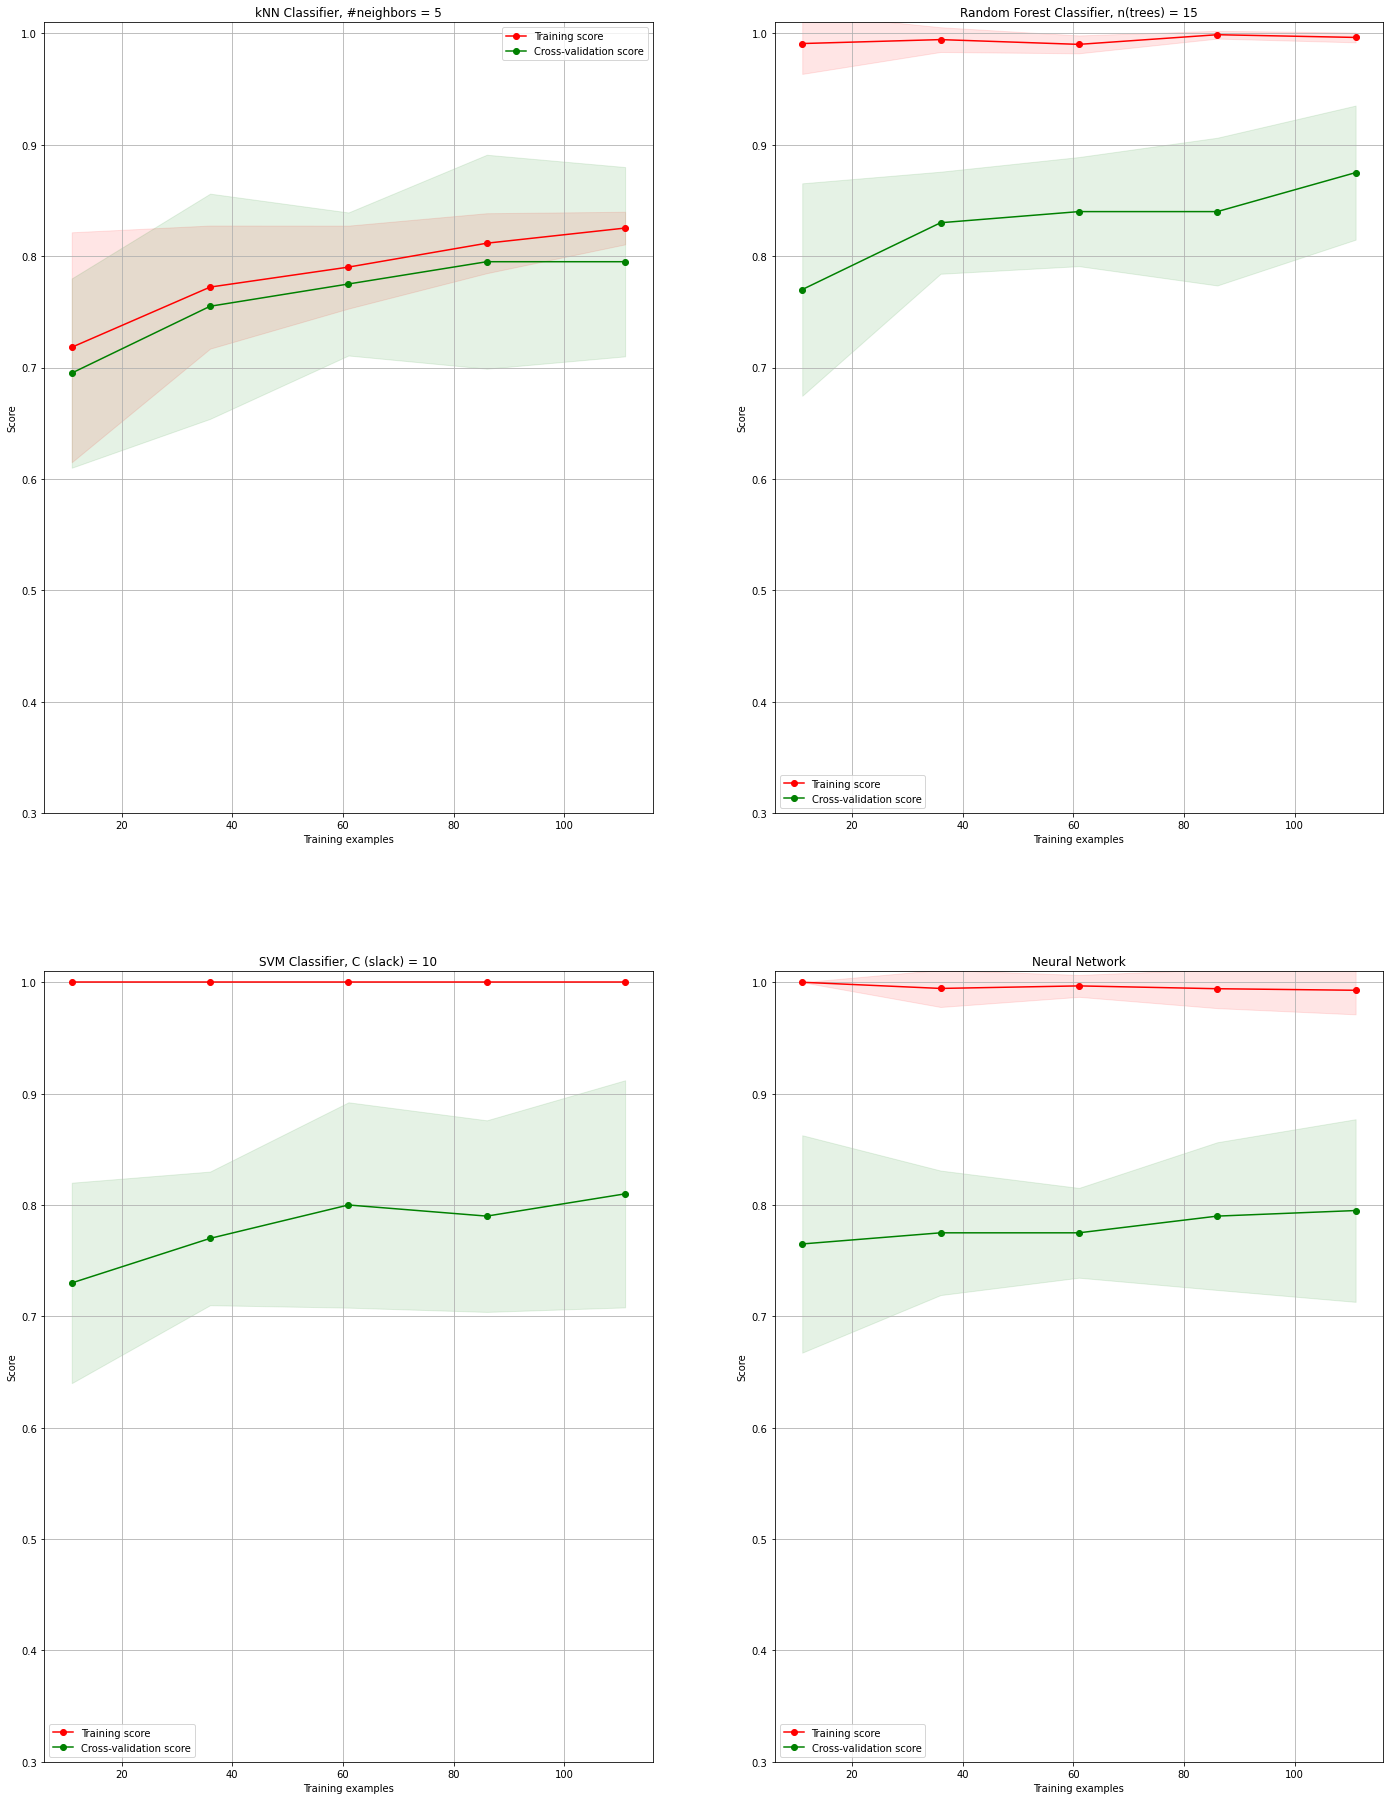

In [67]:
# Classifiers
clsfs = [KNN, RF, SVM, MLP]

# Plot figuren
fig = plt.figure(figsize=(24,8*len(clsfs)))
  
# Create a cross-validation object
cv = ShuffleSplit(n_splits=10, test_size=0.15, random_state=0)
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# cv = StratifiedShuffleSplit(n_splits=10, test_size=0.15, random_state=0)

# Now use the classifiers on all datasets
num = 0
for clf in clsfs:
    # Split data in training and testing
    # title = str(type(clf))
    if hasattr(clf, 'n_estimators'):
        title = f"Random Forest Classifier, n(trees) = {clf.n_estimators}"
    elif hasattr(clf, 'C'):
        title = f"SVM Classifier, C (slack) = {clf.C}"
    elif hasattr(clf, 'n_neighbors'):
        title = f"kNN Classifier, #neighbors = {clf.n_neighbors}"
    elif hasattr(clf, 'hidden_layer_sizes'):
        title = f"Neural Network"
    ax = fig.add_subplot(2, 2, num + 1)
    plot_learning_curve(clf, title, data_df_train, label_train, ax, ylim=(0.3, 1.01), cv=cv)
    num += 1


# Random forest with feature_importances_ MAG WEG

In [68]:
# Feature selection using Feature importances 

# Feature importances
forest = RandomForestClassifier(n_estimators=15, bootstrap=True)

forest.fit(data_df_train2, label_train2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_df_train2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_df_train2.shape[1]), indices)
plt.xlim([-1, data_df_train2.shape[1]])
plt.show()

# Only keep features with importance > 0.00
mask = importances > 0
mask2 = data_df_train2.columns[mask]
data_train2_sel = data_df_train2[mask2]
print(data_train2_sel)

data_val_sel = data_df_val[mask2]
data_test_sel = data_df_test[mask2]
data_train_sel = data_df_train[mask2]

NameError: ignored